In [1]:
import os
os.chdir(path='../')

import gc
import ot
import pickle
import anndata
import scanpy as sc
import pandas as pd
import numpy as np
from scipy import sparse
from scipy.stats import spearmanr, pearsonr
from scipy.spatial import distance_matrix
import matplotlib.pyplot as plt

import commot as ct

trial_name = "trial-Visium_FFPE_Human_Prostate_Cancer"
data_name = "Visium_FFPE_Human_Prostate_Cancer"
plot_dir = f"{trial_name}/plots/commot"
if not os.path.exists(plot_dir):
    os.makedirs(plot_dir)

In [2]:
adata_dis500_cellphonedb = sc.read_h5ad(f"{trial_name}/outputs/commot_cellphonedb.h5ad")
adata_dis500_cellphonedb.obsm['spatial'][:, 1] = -adata_dis500_cellphonedb.obsm['spatial'][:, 1]
adata_dis500_cellphonedb

AnnData object with n_obs × n_vars = 4371 × 17943
    obs: 'in_tissue', 'array_row', 'array_col', 'STForte_Mask', 'leiden', 'region_refined'
    var: 'gene_ids', 'feature_types', 'genome', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm'
    uns: 'commot-cellphonedb-info', 'hvg', 'leiden', 'leiden_color_map', 'leiden_colors', 'log1p', 'neighbors', 'spatial', 'umap'
    obsm: 'STForte_ATTR', 'STForte_COMB', 'STForte_TOPO', 'X_umap', 'commot-cellphonedb-sum-receiver', 'commot-cellphonedb-sum-sender', 'spatial'
    obsp: 'commot-cellphonedb-ADGRE5-CD55', 'commot-cellphonedb-ADM-RAMP3', 'commot-cellphonedb-ADM-RAMP3_CALCRL_GPER1', 'commot-cellphonedb-AGRN-NCAM1', 'commot-cellphonedb-AGRN-PTPRS', 'commot-cellphonedb-AGT-AGTR1', 'commot-cellphonedb-AIMP1-NTRK1', 'commot-cellphonedb-ALDH1A1-RARA_CRABP2', 'commot-cellphonedb-ALDH1A1-RARA_RXRA_CRABP2', 'commot-cellphonedb-ALDH1A1-RARB_CRABP2', 'commot-cellphonedb-ALDH1A1-RARB_RXRB_CRABP2', 'commot-cellphonedb-AL

In [3]:
adata = sc.read_h5ad(f"{trial_name}/outputs/stforte.h5ad")
adata_dis500_cellphonedb.uns['leiden_colors'] = adata.uns['leiden_colors']
adata_dis500_cellphonedb.uns['leiden_color_map'] = adata.uns['leiden_color_map']

In [4]:
colormap = dict(zip(adata_dis500_cellphonedb.obs['leiden'].cat.categories, adata_dis500_cellphonedb.uns['leiden_colors']))

In [5]:
lr_pairs_PTGES = [
    ['PTGES','PTGER4'],
    ['PTGES2','PTGER4'],
    ['PTGES3','PTGER4'],
    ['PTGES','PTGER3'],
    ['PTGES2','PTGER3'],
    ['PTGES3','PTGER3'],
    ['PTGES','PTGER2'],
    ['PTGES2','PTGER2'],
    ['PTGES3','PTGER2'],
]

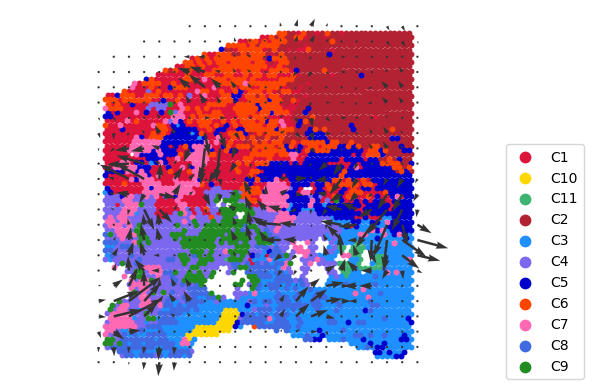

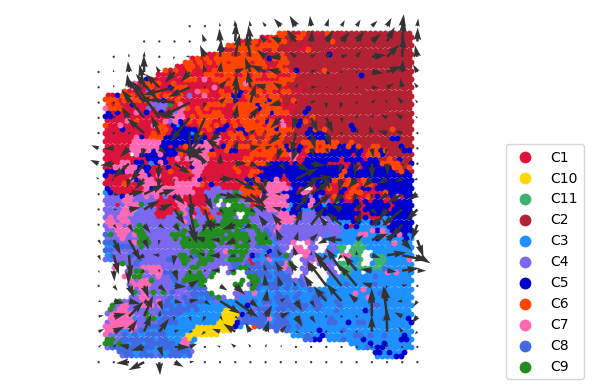

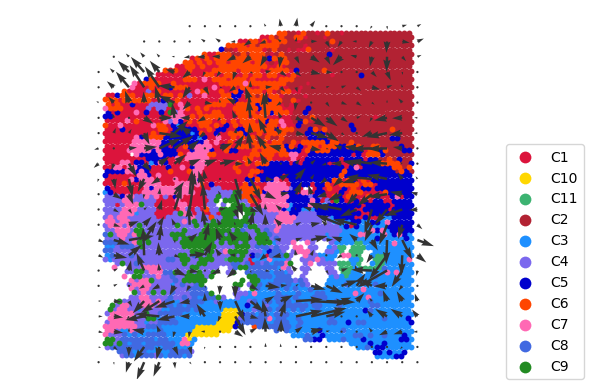

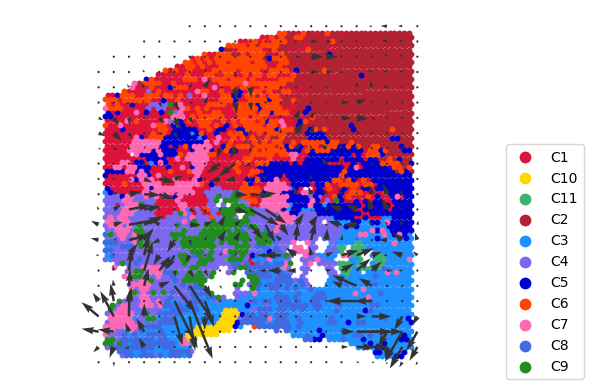

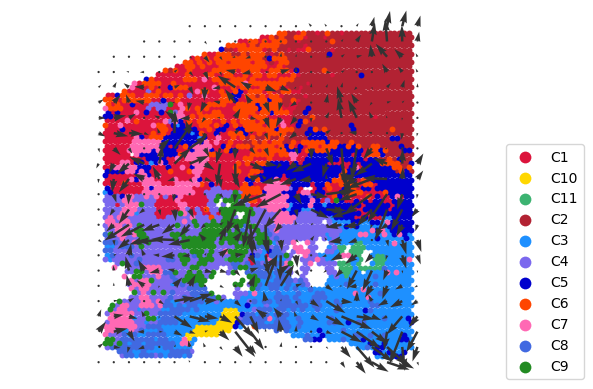

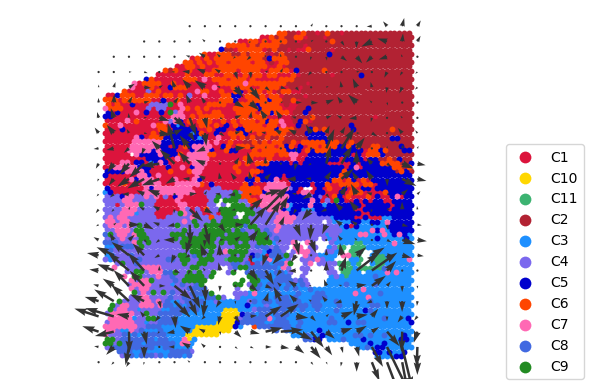

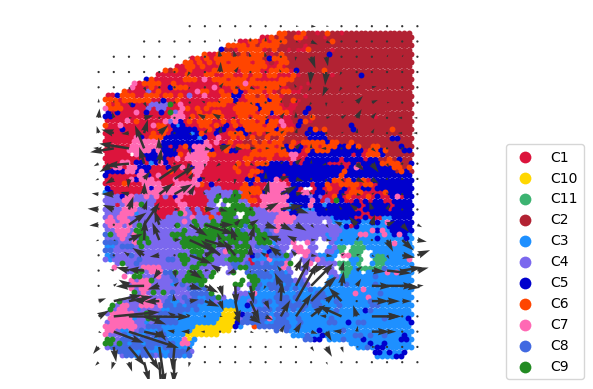

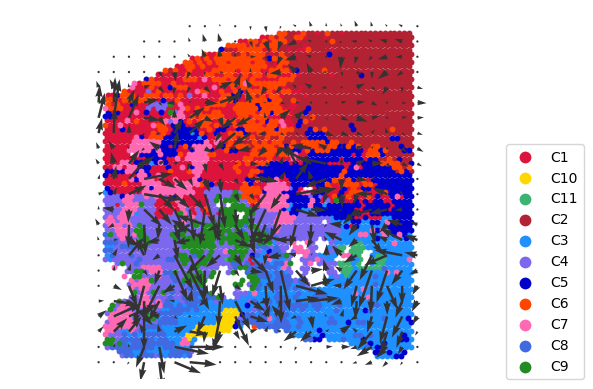

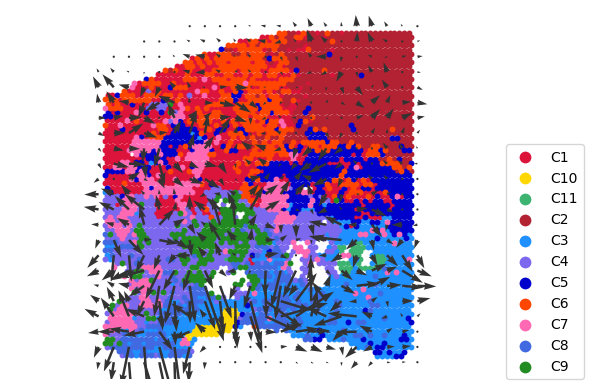

In [6]:
for lr_pair in lr_pairs_PTGES:
    ct.tl.communication_direction(adata_dis500_cellphonedb, database_name='cellphonedb', lr_pair=lr_pair, k=5)
    ct.pl.plot_cell_communication(adata_dis500_cellphonedb, database_name='cellphonedb', lr_pair=lr_pair, plot_method='grid', background_legend=True,
        scale=0.0000005, ndsize=18, grid_density=0.45, summary='receiver', background='cluster', clustering='leiden', 
        cluster_cmap=dict(zip(adata_dis500_cellphonedb.obs['leiden'].cat.categories, adata_dis500_cellphonedb.uns['leiden_colors'])),
        normalize_v = True, normalize_v_quantile=.995,
        filename=f"{plot_dir}/commot_spatialcc_cellphonedb-{lr_pair[0]}-{lr_pair[1]}.pdf")

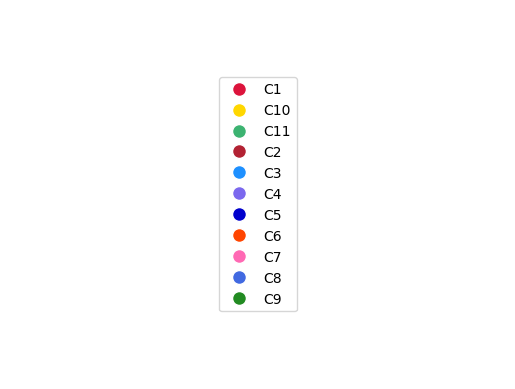

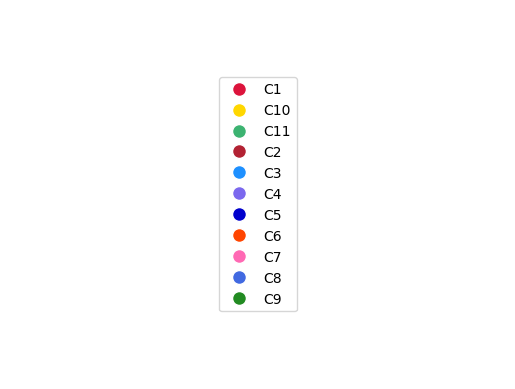

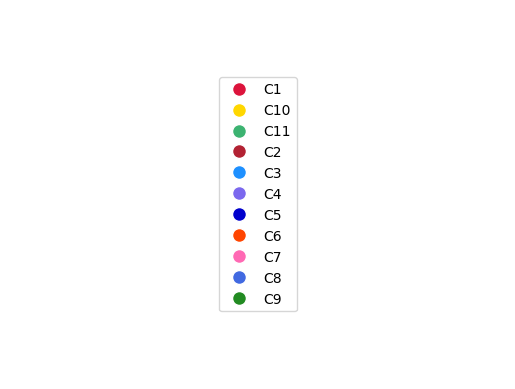

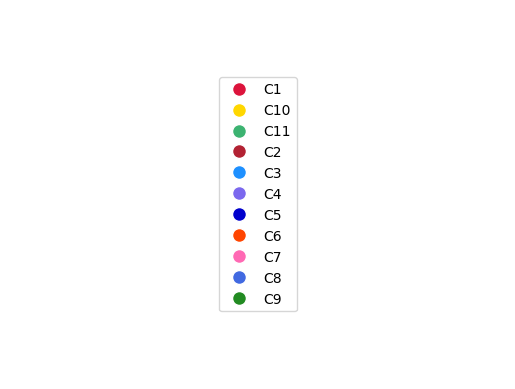

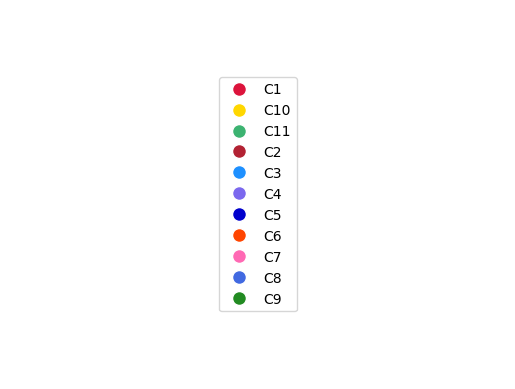

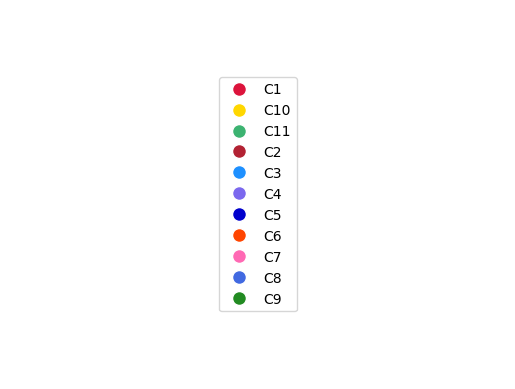

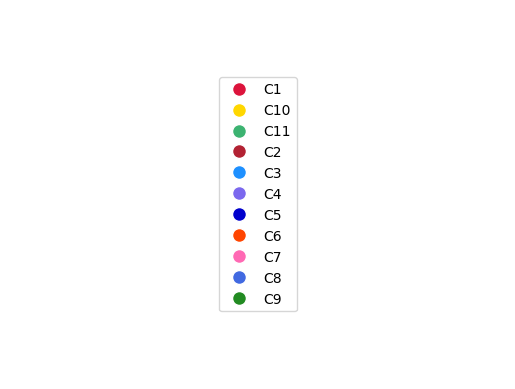

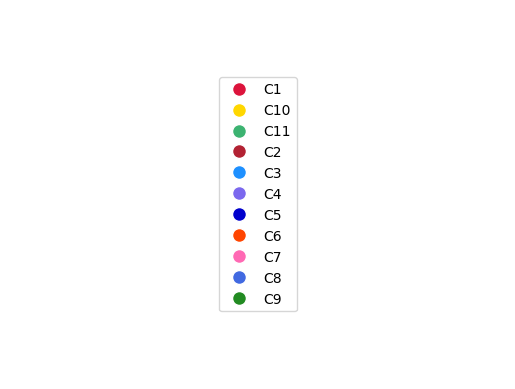

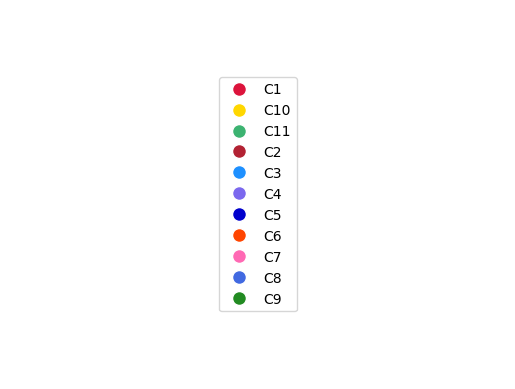

In [7]:
for lr_pair in lr_pairs_PTGES:
    ct.tl.cluster_communication(adata_dis500_cellphonedb, database_name='cellphonedb', lr_pair=lr_pair, clustering='leiden',
        n_permutations=100)
    ct.pl.plot_cluster_communication_network(adata_dis500_cellphonedb, uns_names=[f'commot_cluster-leiden-cellphonedb-{lr_pair[0]}-{lr_pair[1]}'],
        nx_node_pos=None, nx_bg_pos=False, p_value_cutoff = 5e-2, filename=f'{plot_dir}/commot_cluster-leiden-cellphonedb-{lr_pair[0]}-{lr_pair[1]}.pdf',
        nx_node_cmap='Safe', 
        nx_node_cluster_cmap=colormap, nx_edge_colormap='node')

In [8]:
f'./{plot_dir}/commot_cluster-leiden-cellphonedb-{lr_pair[0]}-{lr_pair[1]}.pdf'

'./trial-Visium_FFPE_Human_Prostate_Cancer_pca/plots/commot/commot_cluster-leiden-cellphonedb-PTGES3-PTGER2.pdf'